SECTION 1: TRAINING DATA PREPARATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Setting a seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('train_data.csv')

correlation matrix heatmap, which is used to visually represent the correlation coefficients between pairs of variables

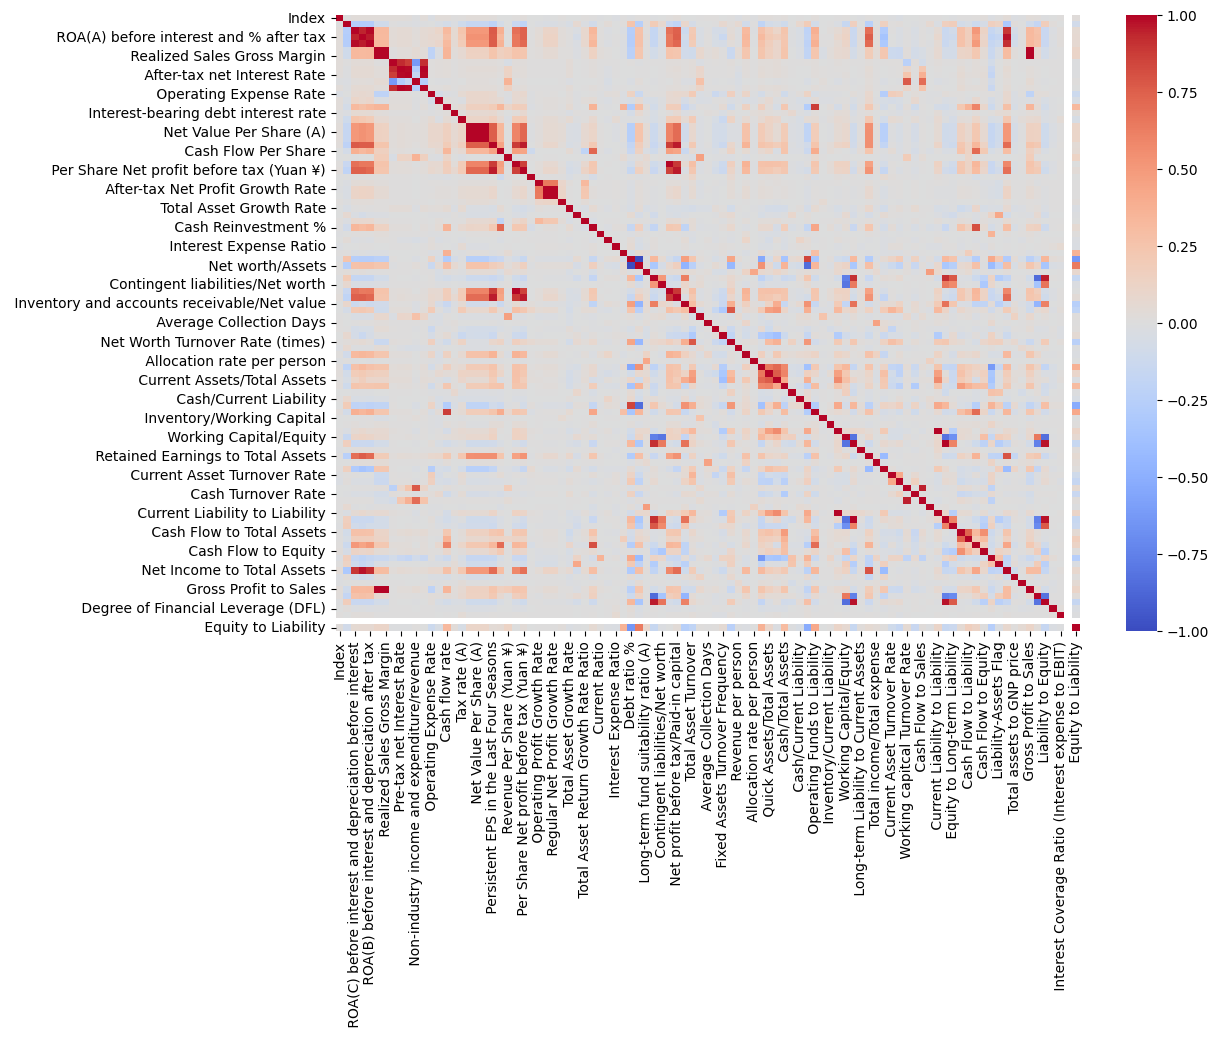

In [2]:
# Visualize the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.show()

 consider features to be highly correlated if their correlation coefficient is greater than or equal to 0.95
 main goal here is to eliminate features that provide redundant information due to high correlation, which helps in reducing the dimensionality of the data and can improve model accuracy and interpretability.

In [3]:
# Identify and remove highly correlated features
threshold = 0.95
columns_to_drop = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            if correlation_matrix.columns[i] not in columns_to_drop:
                columns_to_drop.add(correlation_matrix.columns[j])

data.drop(columns=columns_to_drop, inplace=True)
print("Dropped Columns:", columns_to_drop)

Dropped Columns: {' After-tax Net Profit Growth Rate', ' After-tax net Interest Rate', ' Persistent EPS in the Last Four Seasons', ' ROA(C) before interest and depreciation before interest', ' Pre-tax net Interest Rate', ' Working capitcal Turnover Rate', ' Current Liabilities/Liability', ' Operating Gross Margin', ' Net Value Per Share (A)', ' Operating Profit Per Share (Yuan ¥)', ' ROA(A) before interest and % after tax', ' Current Liabilities/Equity', ' Realized Sales Gross Margin', ' Borrowing dependency', ' Per Share Net profit before tax (Yuan ¥)', ' Current Liability to Equity', ' Debt ratio %', ' Net Value Per Share (B)'}


1. Data Normalization: The MinMaxScaler from scikit-learn is applied to scale all numeric features in the dataset to a range between 0 and 1. This normalization can help improve the performance of many machine learning algorithms that are sensitive to the scale of input features.

2. Feature and Target Preparation: The dataset is split into features (X) and the target variable (y). The target variable in this case appears to be 'Bankrupt?', which suggests a binary classification task (predicting whether a company will go bankrupt or not). The features are all other columns in the dataset except the target.

3. Dataset Splitting: The dataset is divided into training and testing subsets, with 20% of the data reserved for testing. This split is essential for training the model on one set of data and then testing it on unseen data to evaluate its performance.

4. Model Training: A Random Forest Classifier is trained on the training data. This model is an ensemble learning method known for its robustness and effectiveness in classification tasks, as it combines multiple decision trees to improve the overall predictive performance and control over-fitting.

In [4]:
# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [5]:
# Preparing features and target variable
X = data_scaled.drop('Bankrupt?', axis=1)
y = data_scaled['Bankrupt?']

In [6]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Random Forest for Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

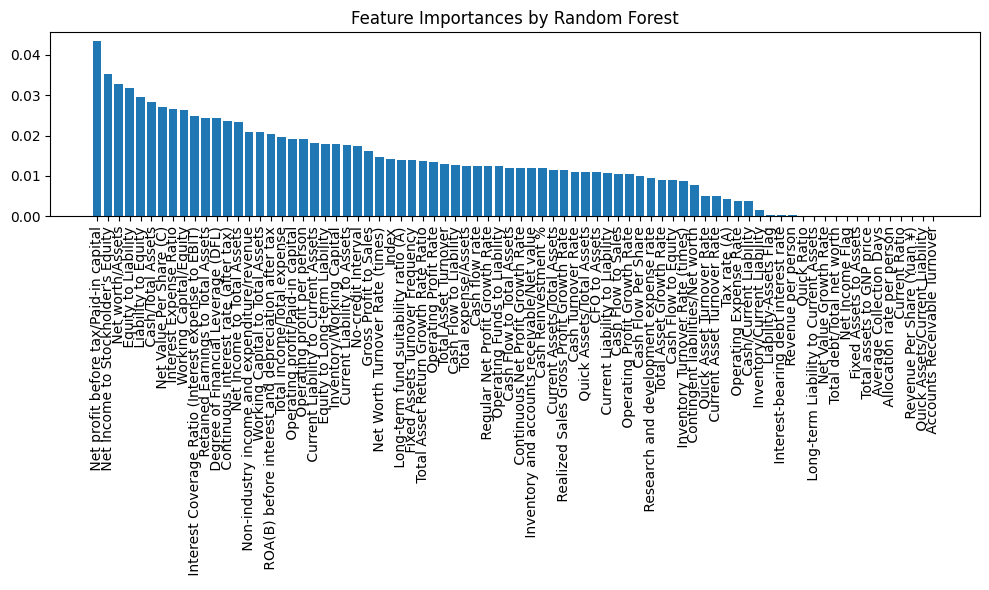

In [9]:
# Plotting feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances by Random Forest')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [10]:
# Select the top 50 features if more than 50 features are left
if len(X_train.columns) > 50:
    selected_features = X_train.columns[indices][:50]
else:
    selected_features = X_train.columns[indices]
print("Selected features:", selected_features)

Selected features: Index([' Net profit before tax/Paid-in capital',
       ' Net Income to Stockholder's Equity', ' Net worth/Assets',
       ' Equity to Liability', ' Liability to Equity', ' Cash/Total Assets',
       ' Net Value Per Share (C)', ' Interest Expense Ratio',
       ' Working Capital/Equity',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Retained Earnings to Total Assets',
       ' Degree of Financial Leverage (DFL)',
       ' Continuous interest rate (after tax)', ' Net Income to Total Assets',
       ' Non-industry income and expenditure/revenue',
       ' Working Capital to Total Assets',
       ' ROA(B) before interest and depreciation after tax',
       ' Total income/Total expense', ' Operating profit/Paid-in capital',
       ' Operating profit per person', ' Current Liability to Current Assets',
       ' Equity to Long-term Liability', ' Inventory/Working Capital',
       ' Current Liability to Assets', ' No-credit Interval',
       ' Gross

In [11]:
fifty_features = selected_features

In [12]:
fifty_features

Index([' Net profit before tax/Paid-in capital',
       ' Net Income to Stockholder's Equity', ' Net worth/Assets',
       ' Equity to Liability', ' Liability to Equity', ' Cash/Total Assets',
       ' Net Value Per Share (C)', ' Interest Expense Ratio',
       ' Working Capital/Equity',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Retained Earnings to Total Assets',
       ' Degree of Financial Leverage (DFL)',
       ' Continuous interest rate (after tax)', ' Net Income to Total Assets',
       ' Non-industry income and expenditure/revenue',
       ' Working Capital to Total Assets',
       ' ROA(B) before interest and depreciation after tax',
       ' Total income/Total expense', ' Operating profit/Paid-in capital',
       ' Operating profit per person', ' Current Liability to Current Assets',
       ' Equity to Long-term Liability', ' Inventory/Working Capital',
       ' Current Liability to Assets', ' No-credit Interval',
       ' Gross Profit to Sales', 

**50 features are:**

Net profit before tax/Paid-in capital',
       ' Net Income to Stockholder's Equity', ' Net worth/Assets',
       ' Equity to Liability', ' Liability to Equity', ' Cash/Total Assets',
       ' Net Value Per Share (C)', ' Interest Expense Ratio',
       ' Working Capital/Equity',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Retained Earnings to Total Assets',
       ' Degree of Financial Leverage (DFL)',
       ' Continuous interest rate (after tax)', ' Net Income to Total Assets',
       ' Non-industry income and expenditure/revenue',
       ' Working Capital to Total Assets',
       ' ROA(B) before interest and depreciation after tax',
       ' Total income/Total expense', ' Operating profit/Paid-in capital',
       ' Operating profit per person', ' Current Liability to Current Assets',
       ' Equity to Long-term Liability', ' Inventory/Working Capital',
       ' Current Liability to Assets', ' No-credit Interval',
       ' Gross Profit to Sales', ' Net Worth Turnover Rate (times)', 'Index',
       ' Long-term fund suitability ratio (A)',
       ' Fixed Assets Turnover Frequency',
       ' Total Asset Return Growth Rate Ratio', ' Operating Profit Rate',
       ' Total Asset Turnover', ' Cash Flow to Liability',
       ' Total expense/Assets', ' Cash flow rate',
       ' Regular Net Profit Growth Rate', ' Operating Funds to Liability',
       ' Cash Flow to Total Assets', ' Continuous Net Profit Growth Rate',
       ' Inventory and accounts receivable/Net value', ' Cash Reinvestment %',
       ' Current Assets/Total Assets',
       ' Realized Sales Gross Profit Growth Rate', ' Cash Turnover Rate',
       ' Quick Assets/Total Assets', ' CFO to Assets',
       ' Current Liability to Liability', ' Cash Flow to Sales',
       ' Operating Profit Growth Rate'],
      

SECTION 2:

1. Standardization: The StandardScaler is applied to standardize the features in X, scaling them to have zero mean and unit variance. This is crucial for clustering algorithms like KMeans, which are sensitive to the scale of the input features.

2. Silhouette Scores Calculation: The code evaluates the optimal number of clusters (k) for KMeans clustering by computing the silhouette scores for k ranging from 3 to 9. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters, with higher scores indicating better defined clusters.

3. KMeans Clustering: For each k, a KMeans clustering model is initialized and fitted to the scaled data, and the clustering solution is used to compute the silhouette score. This score is stored and printed for each k.

4. Visualization: The silhouette scores are plotted against the number of clusters using Matplotlib to visually determine the k that results in the best clustering (i.e., the highest silhouette score).

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [14]:
X = data[fifty_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Determine the optimal number of clusters using silhouette scores
silhouette_scores = []
for k in range(3, 10):  # 3 team member,
    kmeans = KMeans(n_clusters=k,n_init = 10, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, clusters)
    silhouette_scores.append(score)
    print(f"Silhouette score for k={k}: {score}")

Silhouette score for k=3: 0.1546530470802978
Silhouette score for k=4: 0.13066099458076494
Silhouette score for k=5: 0.1149790910455247
Silhouette score for k=6: 0.1094075323567366
Silhouette score for k=7: 0.08073668475906054
Silhouette score for k=8: 0.118929398752064
Silhouette score for k=9: 0.07865215838568701


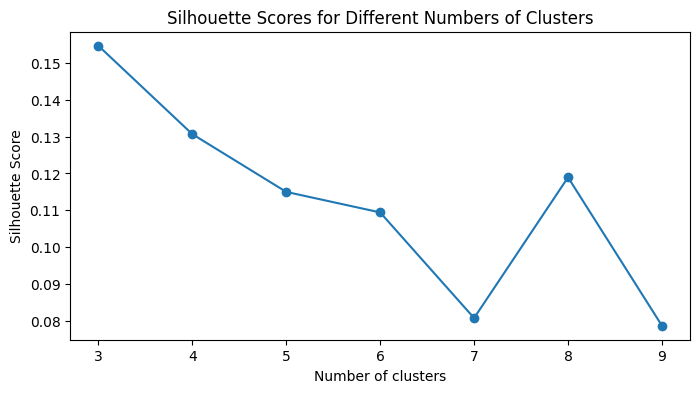

In [16]:
# Plot silhouette scores to find the optimal k
plt.figure(figsize=(8, 4))
plt.plot(range(3, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

idea k value is K = 3

In [18]:
# from the silhouette scores, the optimal k is found
optimal_k = 3
kmeans_optimal = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
clusters_optimal = kmeans_optimal.fit_predict(X_scaled)

In [19]:
data['Cluster_ID'] = clusters_optimal

# Display the mean of each feature by cluster
cluster_means = data.groupby('Cluster_ID').mean()
print("Mean values of features per cluster:\n", cluster_means)


Mean values of features per cluster:
                   Index  Bankrupt?  \
Cluster_ID                           
0           2876.633556   0.047690   
1           2965.824701   0.001138   
2           1677.000000   1.000000   

             ROA(B) before interest and depreciation after tax  \
Cluster_ID                                                       
0                                                    0.534378    
1                                                    0.599055    
2                                                    0.349430    

             Operating Profit Rate  \
Cluster_ID                           
0                         0.998574   
1                         0.999075   
2                         0.998727   

             Non-industry income and expenditure/revenue  \
Cluster_ID                                                 
0                                               0.303575   
1                                               0.303952   
2        

In [20]:
cluster_means

,Index,Bankrupt?,ROA(B) before interest and depreciation after tax,Operating Profit Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Cluster_ID,,,,,,,,,,,,,,,,,,,,,
0,2876.633556,0.047690,0.534378,0.998574,0.303575,0.781125,2.104731e+09,1.895153e+09,0.463693,1.167161e+07,...,0.796405,2.131208e+07,0.623996,0.604581,0.839863,0.281039,0.027718,0.565236,1.0,0.037523
1,2965.824701,0.001138,0.599055,0.999075,0.303952,0.781934,1.751334e+09,2.188668e+09,0.476375,2.639670e+07,...,0.834880,1.051793e+07,0.624108,0.615751,0.842647,0.277796,0.026821,0.565338,1.0,0.071324
2,1677.000000,1.000000,0.349430,0.998727,0.302805,0.780991,1.040000e+09,1.320000e+09,0.461348,4.773810e-04,...,0.621947,1.826849e-03,0.624070,0.595002,0.262276,0.796348,0.026716,0.564746,1.0,0.010432


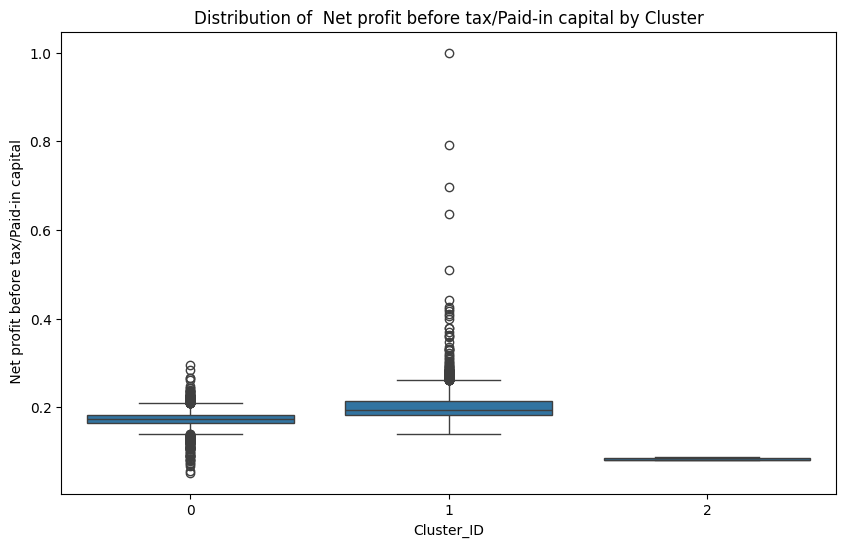

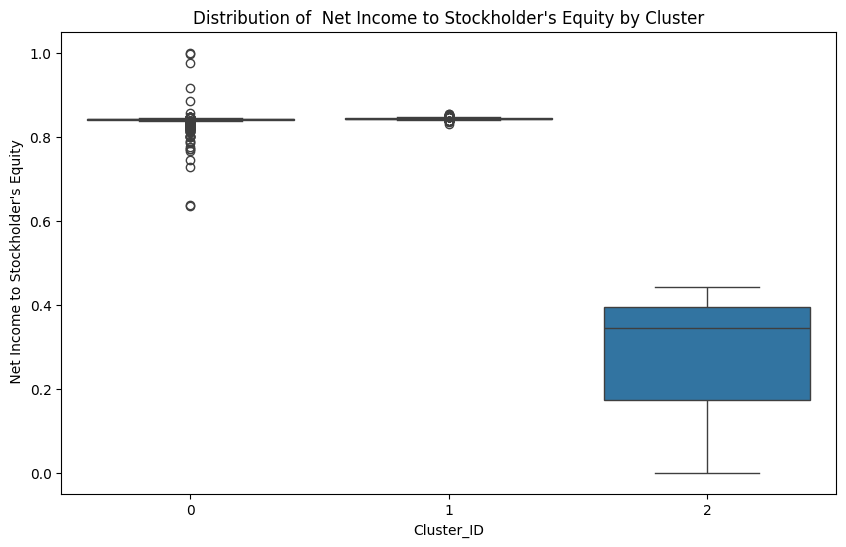

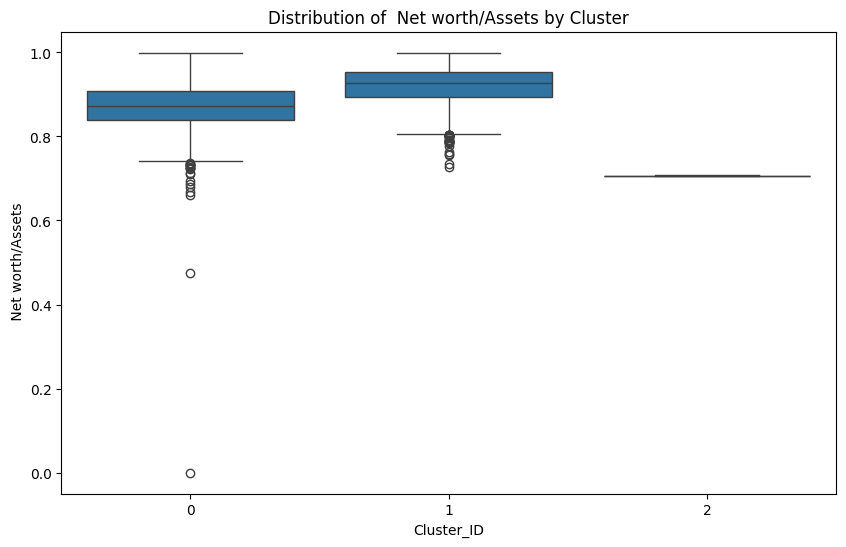

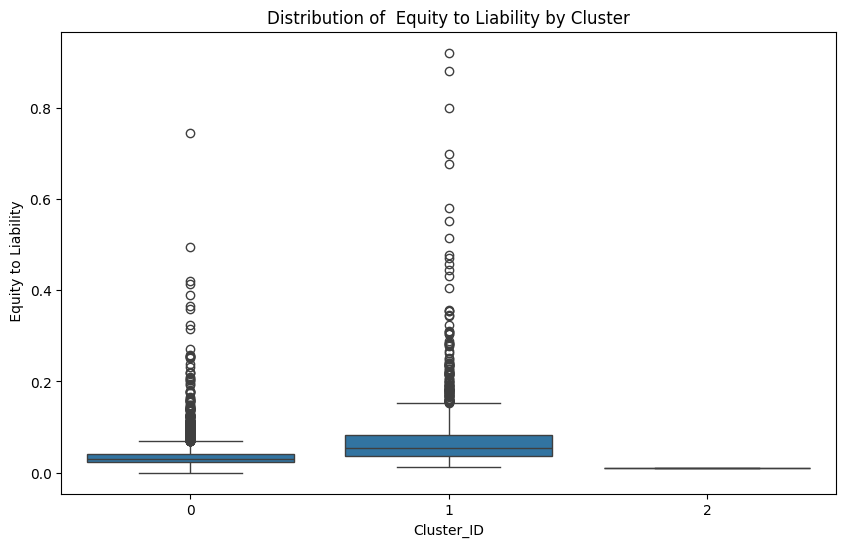

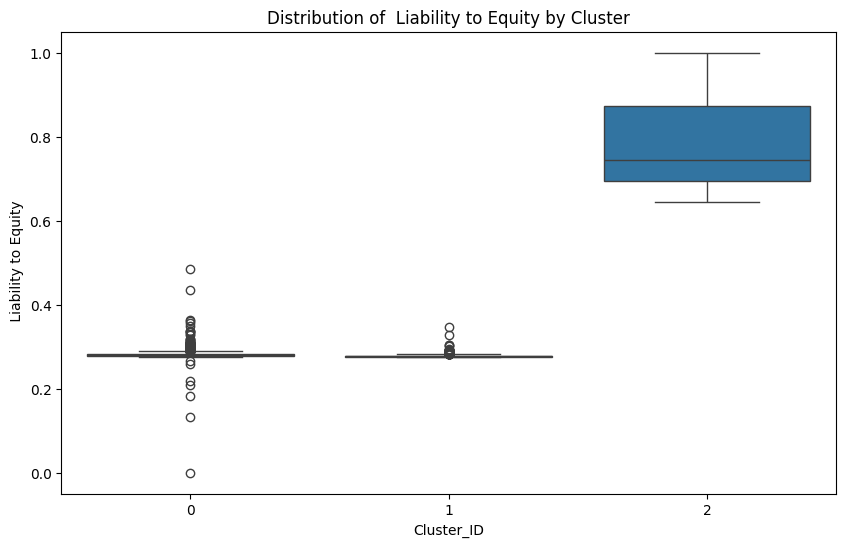

In [21]:
features_to_plot = fifty_features[:5]  # You can adjust this based on your specific interest
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster_ID', y=feature, data=data)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()